In [1]:
"""
A network with an inhomogeneous weight structure (anisotropic network)

This example contains a reservoir network of 4500 neurons, distributed over 2 Loihi chips.
3600 neurons are excitatory and 900 neurons are inhibitory.
The neurons are locally connected with a gaussian distribution on a 2-dimensional grid of neurons.
Edges are connected to form a torus shape.
The gaussian distribution is shifted, where the shift direction is drawn by perlin noise.
The network activity is started with a short cue input and then maintained.

The experiment is defined in 'pelenet/experiments/anisotropic.py' file.
A log file, parameters, and plot figures are stored in the 'log' folder for every run of the simulation.

NOTE: The main README file contains some more information about the structure of pelenet
"""

# Load pelenet modules
from pelenet.utils import Utils
from pelenet.experiments.anisotropic import AnisotropicExperiment

# Official modules
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Overwrite default parameters (pelenet/parameters/ and pelenet/experiments/anisotropic.py)
parameters = {
    # Experiment
    'seed': 3,  # Random seed
    'trials': 1,  # Number of trials
    'stepsPerTrial': 600,  # Number of simulation steps for every trial
    # Network
    'refractoryDelay': 2, # Refactory period
    'voltageTau': 10.24,  # Voltage time constant
    'currentTau': 10.78,  # Current time constant
    'thresholdMant': 1000,  # Spiking threshold for membrane potential
    'reservoirConnProb': 0.05,  # Connection probability
    # Anisotropic
    'anisoStdE': 12,  # Space constant, std of gaussian for excitatory neurons
    'anisoStdI': 9,  # Space constant, std of gaussian for inhibitory neurons (range 9 - 11)
    'anisoShift': 1,  # Intensity of the shift of the connectivity distribution for a neuron
    #'percShift': 1,  # Percentage of shift (default 1)
    'anisoPerlinScale': 4,  # Perlin noise scale, high value => dense valleys, low value => broad valleys
    'weightExCoefficient': 12,  # Coefficient for excitatory anisotropic weight
    'weightInCoefficient': 48,  # Coefficient for inhibitory anisotropic weight
    # Input
    'inputIsTopology': True,  # Activate a 2D input area
    'inputNumTargetNeurons': 36,  # Number of target neurons for the input
    'inputSteps': 5,  # Number of steps the network is activated by the input
    'inputWeightExponent': 0,  # The weight exponent of the weights from the generator to the target neurons
    'inputGenSpikeProb': 1.0,  # Spiking probability of the spike generators
    # Probes
    'isExSpikeProbe': True,  # Probe excitatory spikes
    'isInSpikeProbe': True   # Probe inhibitory spikes
}

In [3]:
# Initilizes the experiment, also initializes the log
# Creating a new object results in a new log entry in the 'log' folder
# The name is optional, it is extended to the folder in the log directory
exp = AnisotropicExperiment(name = 'anisotropic-network', parameters = parameters)

In [4]:
# Instantiate the utils singleton
utils = Utils.instance()

In [5]:
# Build the network, in this function the weight matrix, inputs, probes, etc. are defined and created
exp.build()

In [6]:
# Calc and show spectral radius of weight matrix
utils.getSpectralRadius(exp.net.initialWeights)

1.72

In [7]:
np.shape(exp.net.inputSpikes)

(36, 5)

In [8]:
# Run the network simulation, afterwards the probes are postprocessed to nice arrays
exp.run()

INFO:DRV:  Connecting to 127.0.0.1:34725
INFO:DRV:      Host server up..............Done 0.05s
INFO:DRV:      Encoding axons/synapses.....Done 15.07s
INFO:DRV:      Compiling Embedded snips....Done 0.16s
INFO:DRV:      Encoding probes.............Done 4.78ms
INFO:HST:  Using Kapoho Bay serial number 308
INFO:HST:  Args chip=0 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1599733310.5772798/launcher_chip0_lmt0.bin --chips=2 --remote-relay=0 --epoch=0 
INFO:HST:  Args chip=1 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/../bin/x86/kb/init_bs.bin --chips=2 --remote-relay=0 --epoch=0 
INFO:HST:  Lakemont_driver...
INFO:DRV:      Booting up..................Done 1.29s
INFO:DRV:      Configuring registers.......Done 15.53s
INFO:DRV:      Transferring spikes.........Done 3.34ms
INFO:DRV:      Transferring probes.........Done 0.02s
INFO:HST:  chip=1 cpu=0 halted, status=0x0

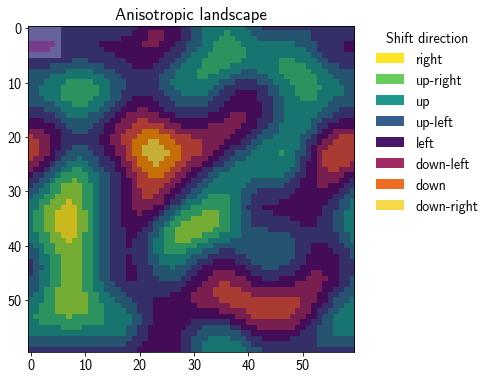

In [9]:
# Shift directions, created by the perlin noise
# The input area is marked top left with a white transparent square
exp.net.plot.landscape()

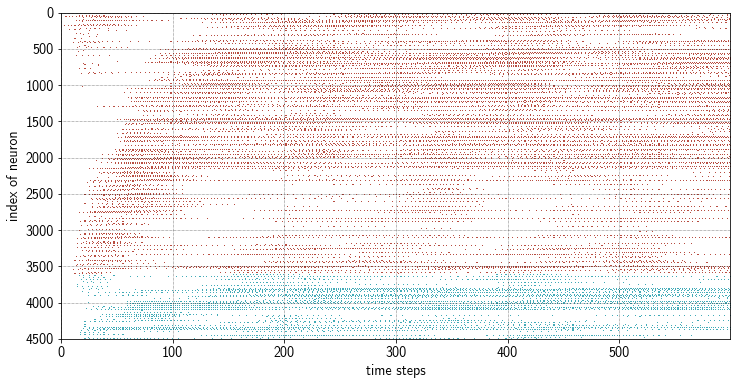

In [10]:
# Plot spike trains of the excitatory (red) and inhibitory (blue) neurons
exp.net.plot.reservoirSpikeTrain(figsize=(12,6), to=600)

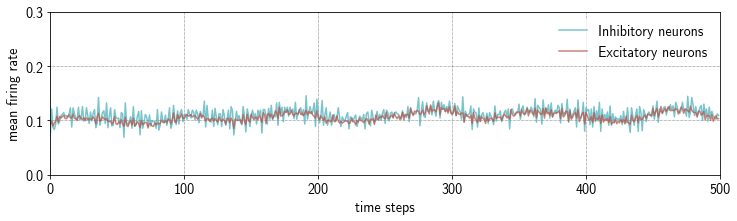

In [11]:
# Plot firing rates of the excitatory (red) and inhibitory (blue) neurons
exp.net.plot.reservoirRates(figsize=(12,3), fr=50, to=550, ylim=(0,0.3))

/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


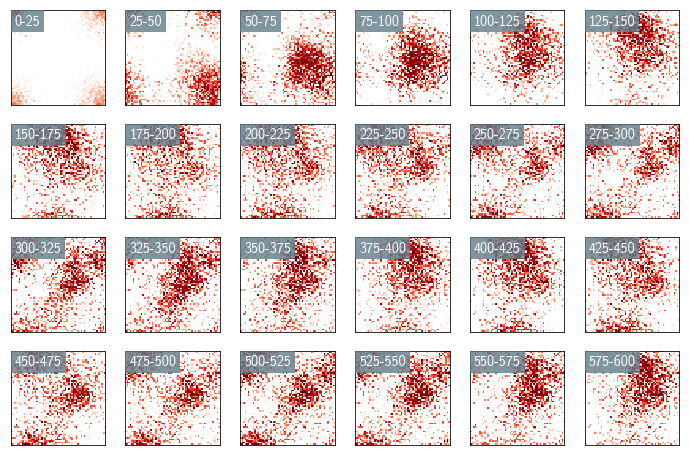

In [12]:
# Plot binned activity in topology, shows stream-like activity of anisotropic network
exp.net.plot.streamActivity(binSize=25, nrows=4, ncols=6)